# 🚨🔍 DDOS Classifier 🔍🚨  

## 🔐🌐 ----------------- DDoS ATTACK CLASSIFIER DASHBOARD ----------------- 🌐🔐

**🔎 Objective:** Detect and classify DDoS (Distributed Denial of Service) attacks from normal network traffic using Machine Learning.

**📁 Dataset:** CIC-DDoS2019 — Collected by the Canadian Institute for Cybersecurity using CICFlowMeter-V3.

**⚙️ Techniques Used:** Data preprocessing, Exploratory Data Analysis (EDA), feature importance, model training, and evaluation.

**📊 Output:** Classifier that distinguishes between **DDoS** and **BENIGN** traffic with high accuracy.

---


### Import Some Helper Library

In [44]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler , MinMaxScaler , PolynomialFeatures
from sklearn.pipeline import Pipeline , make_pipeline
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer , KNNImputer
from category_encoders import BinaryEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , VotingClassifier , BaggingClassifier ,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score ,fbeta_score
from sklearn.model_selection import cross_validate , train_test_split , GridSearchCV , StratifiedKFold , RandomizedSearchCV
from sklearn.feature_selection import SequentialFeatureSelector , SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import make_pipeline , pipeline
import joblib
from imblearn.under_sampling import RandomUnderSampler

### Read Data Set

In [46]:
df = pd.read_csv('DDOS_DataSet.csv')

### Data OverView

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Mean       225745 non-nul

In [5]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Idle Mean,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,12,0,0,33,-1,1,20,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,6,1,6,29,256,0,20,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,6,1,6,29,256,0,20,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,6,1,6,31,329,0,20,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,12,0,0,32,-1,1,20,0.0,0.0,BENIGN


In [6]:
df.tail()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Idle Mean,Label
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,6,1,6,288,253,0,20,0.0,0.0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,6,1,6,288,253,0,20,0.0,0.0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,6,1,6,288,253,0,20,0.0,0.0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,12,0,0,4719,-1,1,20,0.0,0.0,BENIGN
225744,192.168.10.15-8.43.72.21-61326-80-6,8.43.72.21,80,192.168.10.15,61326,6,7/7/2017 5:02,68,1,1,...,6,1,6,13140,64240,0,20,0.0,0.0,BENIGN


In [50]:
df.dropna(inplace=True)

### 🔧 Handling Column Names

In [51]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

### 🧼 Cleaning

In [52]:
df.drop('Fwd_Header_Length.1',axis=1,inplace=True)

In [53]:
df.drop(columns=['Flow_ID', 'Source_IP', 'Destination_IP','Source_Port','Destination_Port'], inplace=True)

In [54]:
df['Hour'] = pd.to_datetime(df['Timestamp']).dt.hour

In [55]:
df.drop('Timestamp',axis=1,inplace=True)

### 🧠 Feature Engineering & Dimensionality Reduction

In this step, we performed essential **feature engineering** and removed certain columns based on the following criteria:

- 🧹 **Removed highly correlated features** to reduce multicollinearity and avoid redundancy.
- 🧱 **Dropped irrelevant or low-variance features** that do not contribute meaningfully to the model.
- 📐 **Created engineered features** such as:
  - `Flag_Sum`
  - `Pkt Size Ratio`
  - `Header Length Diff`
  - ...and others based on insights from the EDA.

This helps improve **model generalization**, reduce **overfitting**, and simplify **high-dimensional space** for better performance.


#### Flow_Efficiency

In [9]:
df['Flow_Efficiency'] = df['Flow_Bytes/s'] / (df['Flow_Packets/s'] + 1e-5)

In [10]:
df.drop(['Flow_Bytes/s','Flow_Packets/s'],axis=1,inplace=True)

#### Pkt Size Ratio

In [11]:
df['Pkt_Size_Ratio'] = (df['Total_Length_of_Fwd_Packets'] + 1) / (df['Total_Length_of_Bwd_Packets'] + 1)

In [12]:
df.drop(['Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets'],axis=1,inplace=True)

#### Total Packets

In [13]:
df['Total_Packets'] = df['Total_Fwd_Packets'] + df['Total_Backward_Packets']

In [14]:
df.drop(['Fwd_Header_Length','Bwd_Header_Length'],axis=1,inplace=True)

#### Flag Sum

In [15]:
flag_cols = ['FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 
             'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count', 
             'CWE_Flag_Count', 'ECE_Flag_Count']
df['Flag_Sum'] = df[flag_cols].sum(axis=1)

In [16]:
df.drop(['FIN_Flag_Count', 'SYN_Flag_Count', 'RST_Flag_Count', 
             'PSH_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count', 
             'CWE_Flag_Count', 'ECE_Flag_Count'],axis=1,inplace=True)

#### Byte Rate Ratio

In [17]:
df['Byte_Rate_Ratio'] = (df['Avg_Fwd_Segment_Size'] + 1) / (df['Avg_Bwd_Segment_Size'] + 1)

In [18]:
df.drop(['Avg_Fwd_Segment_Size','Avg_Bwd_Segment_Size'],axis=1,inplace=True)
df.dropna(inplace=True)

### ⚖️ Check Label Balance

<Axes: xlabel='Label', ylabel='Count'>

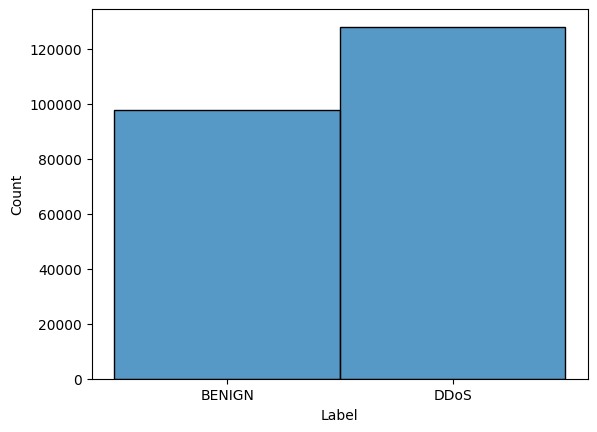

In [20]:
sns.histplot(df['Label'])

##### No Balance Problem

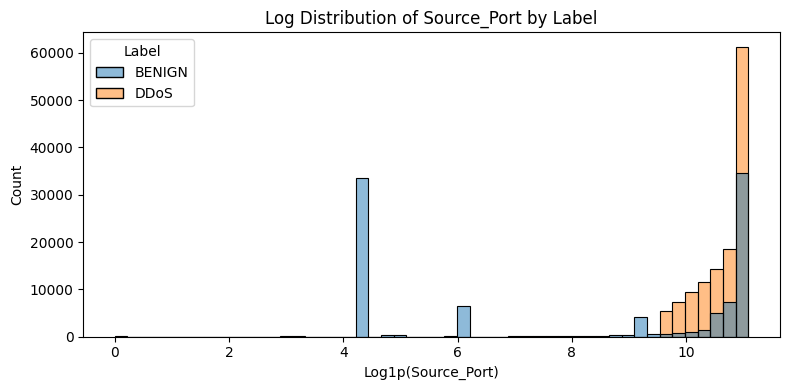

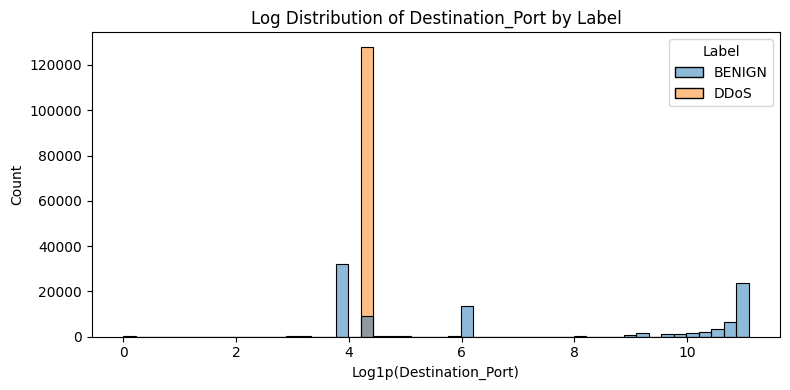

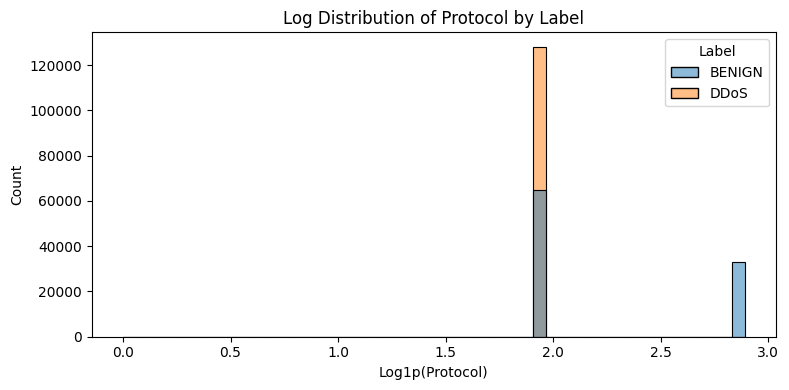

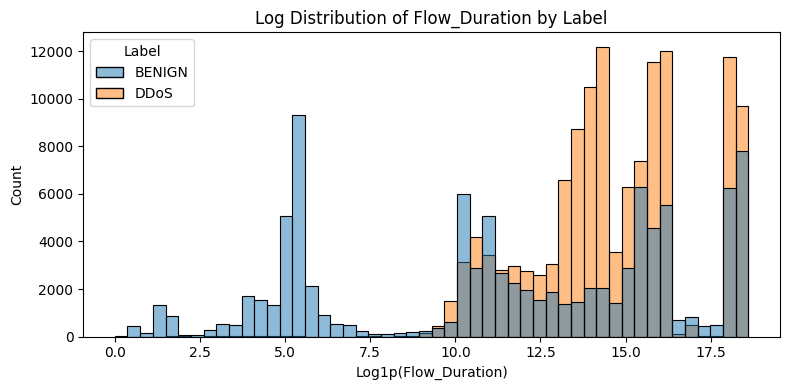

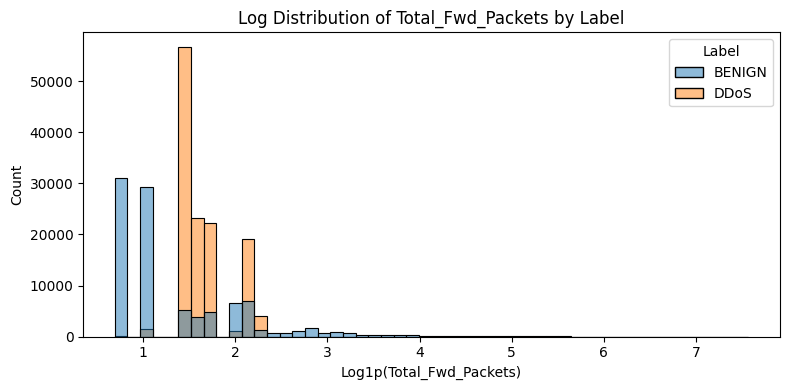

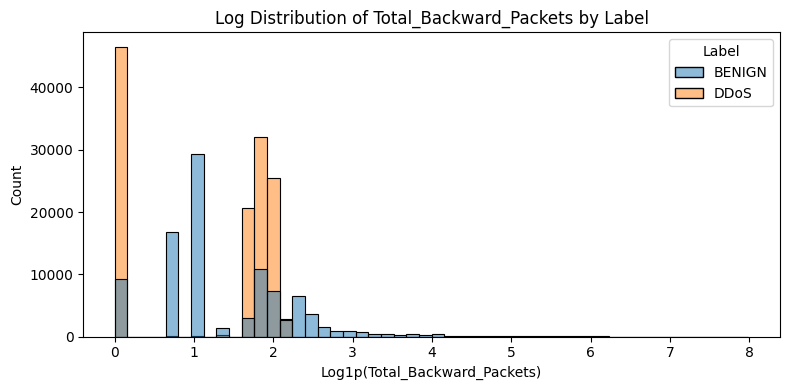

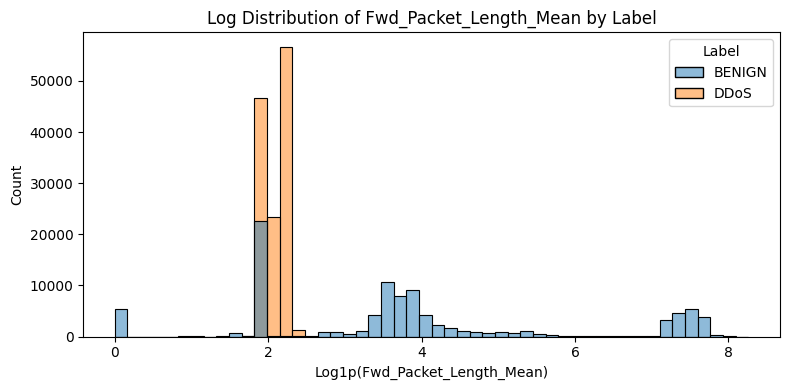

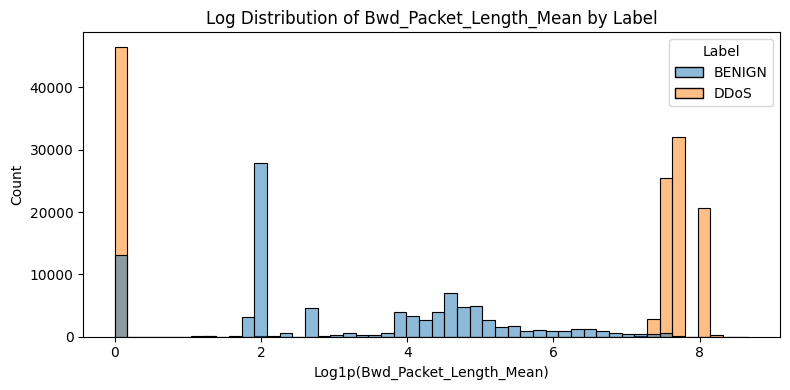

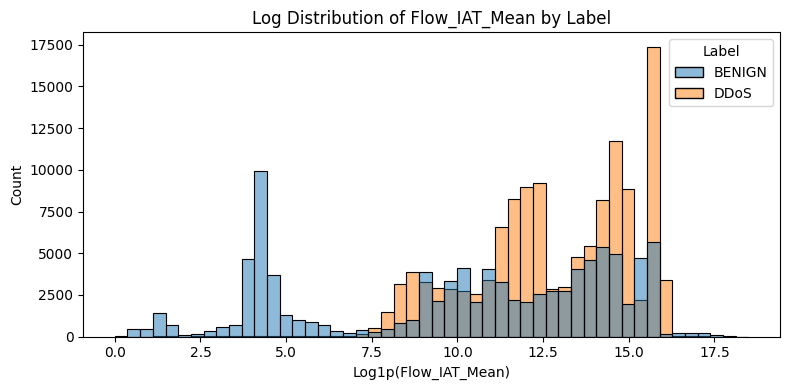

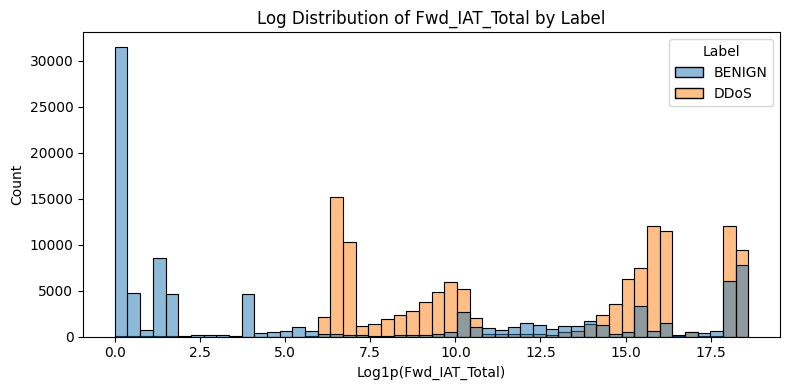

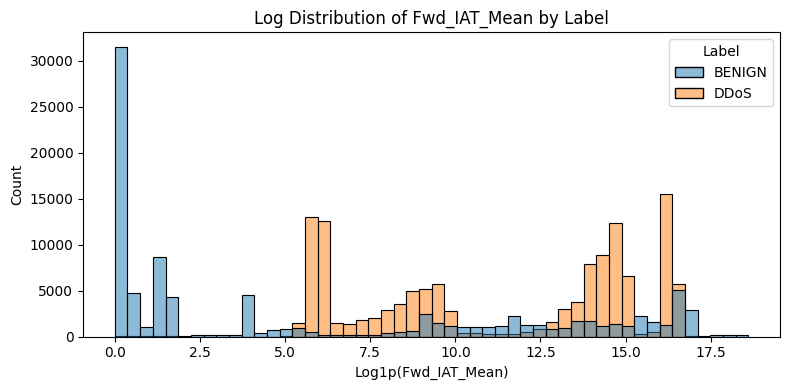

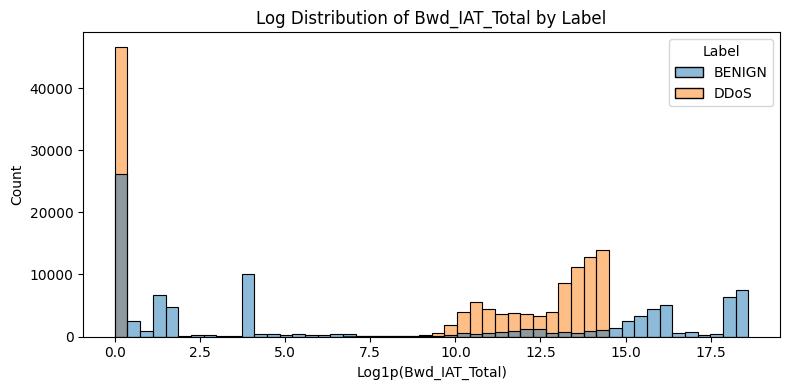

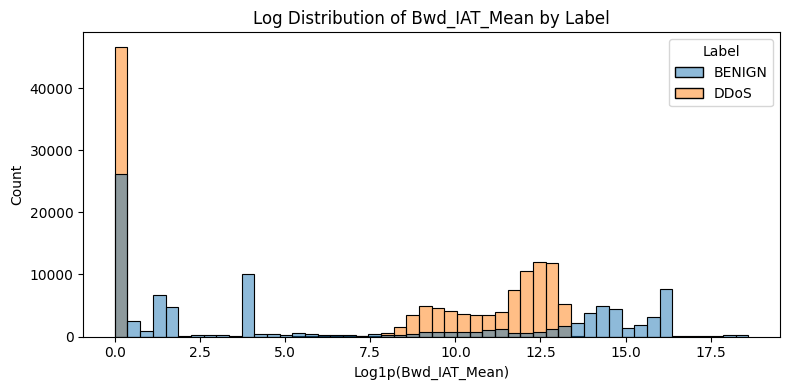

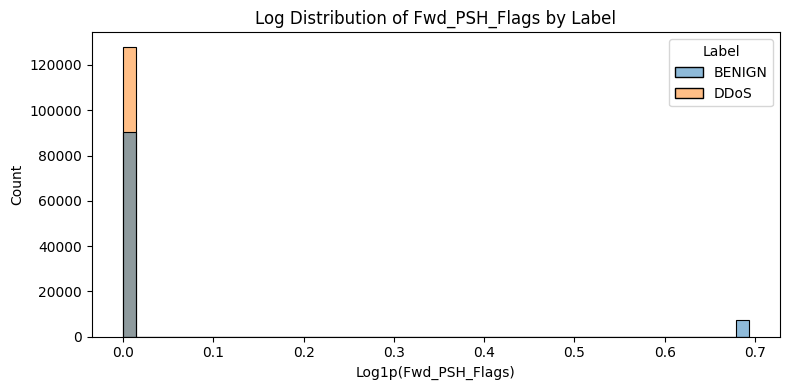

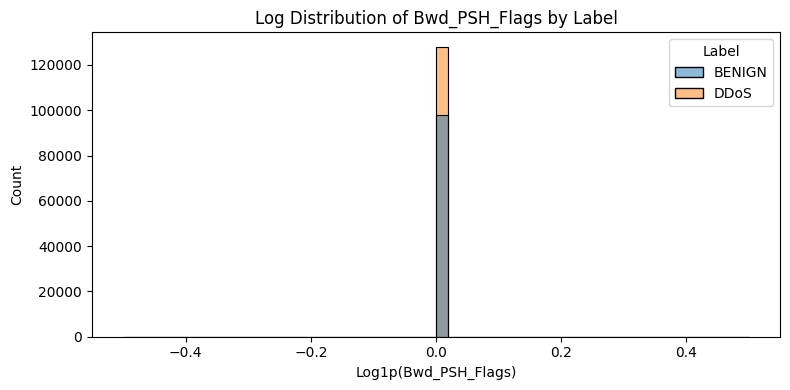

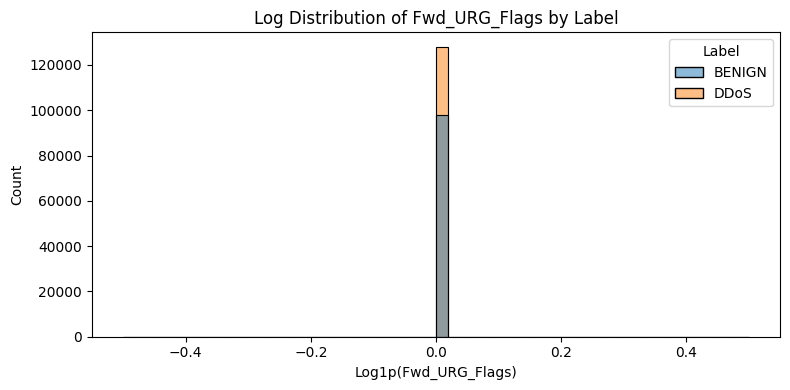

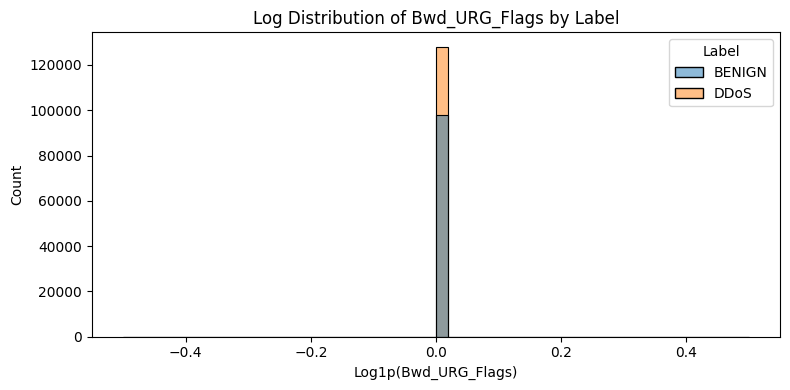

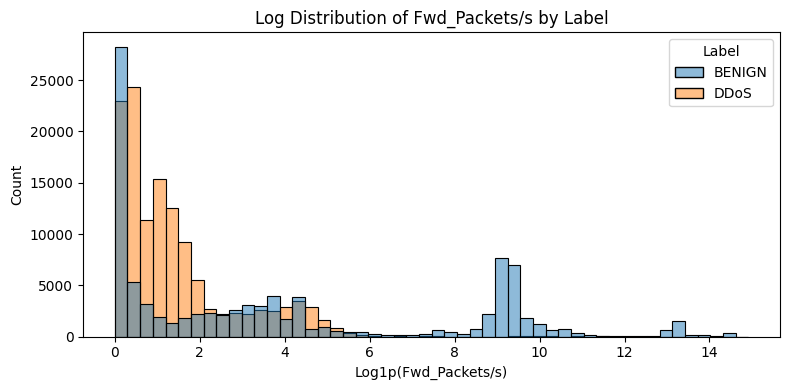

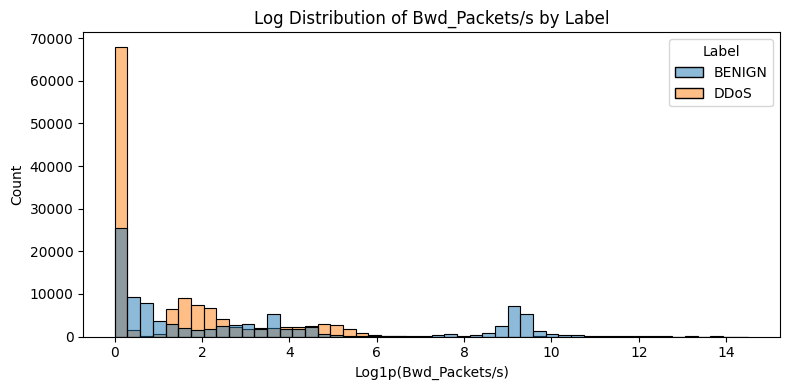

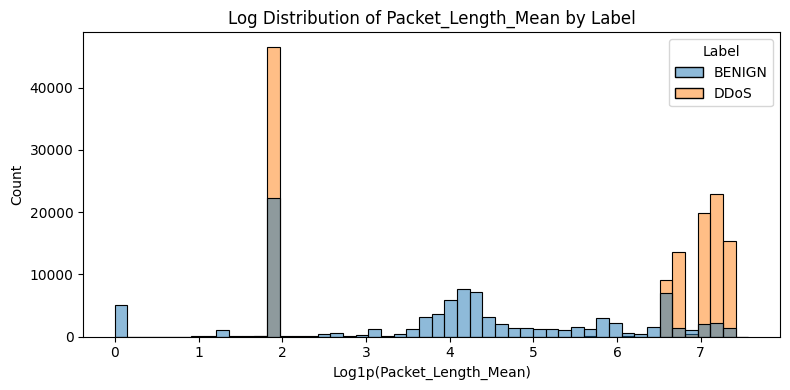

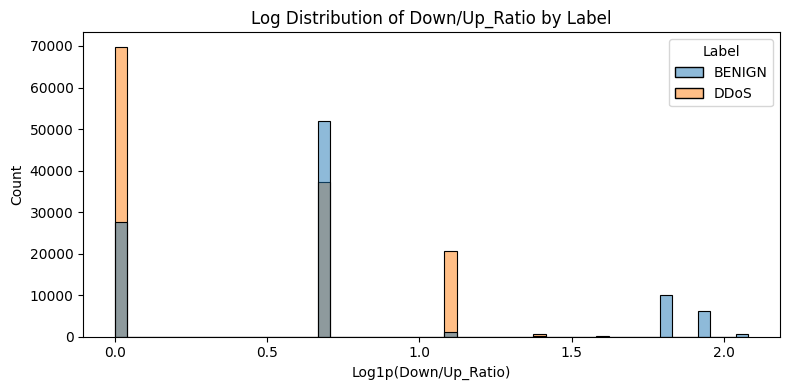

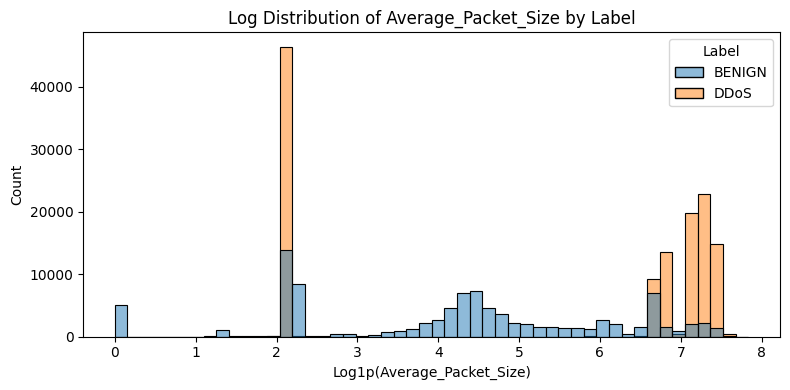

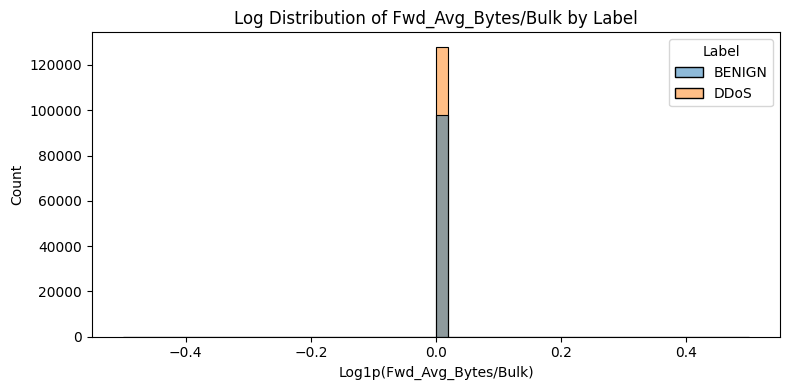

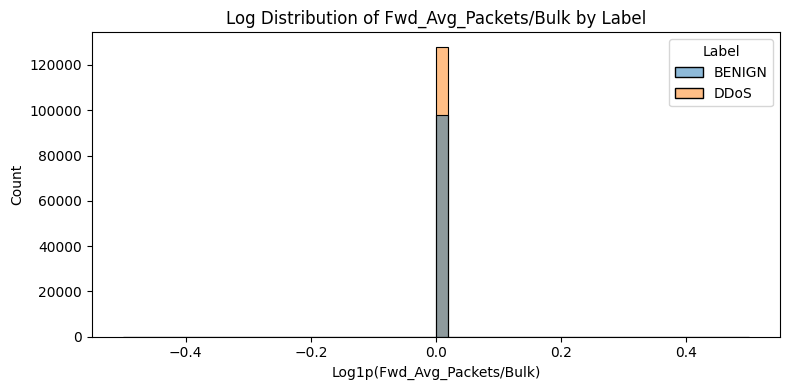

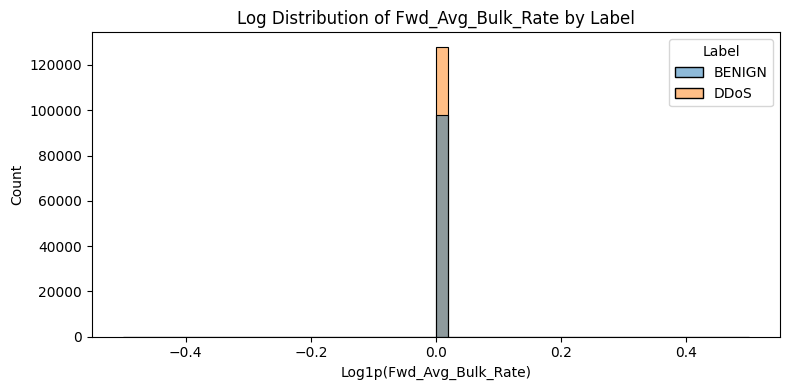

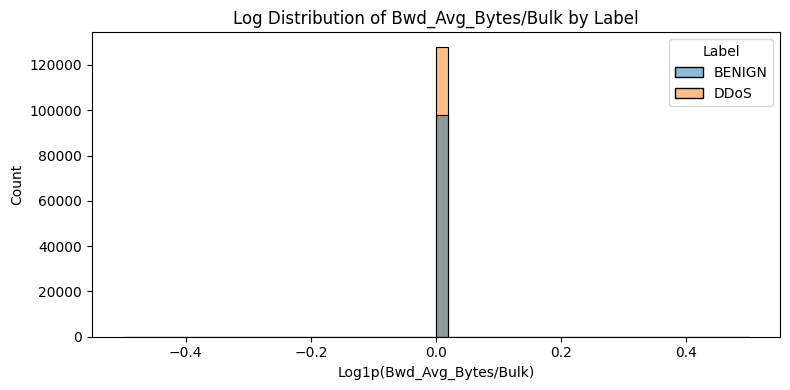

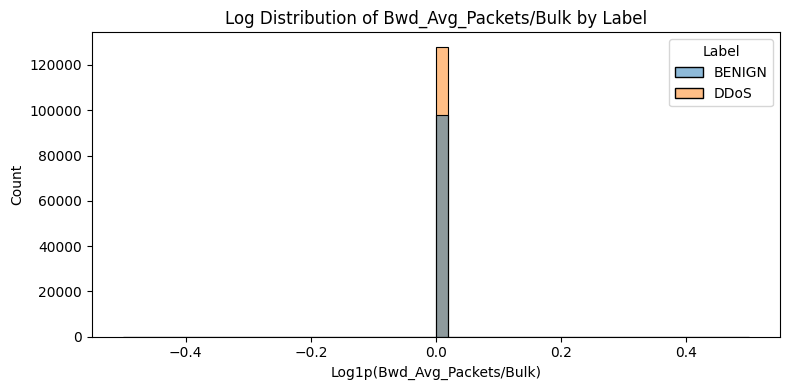

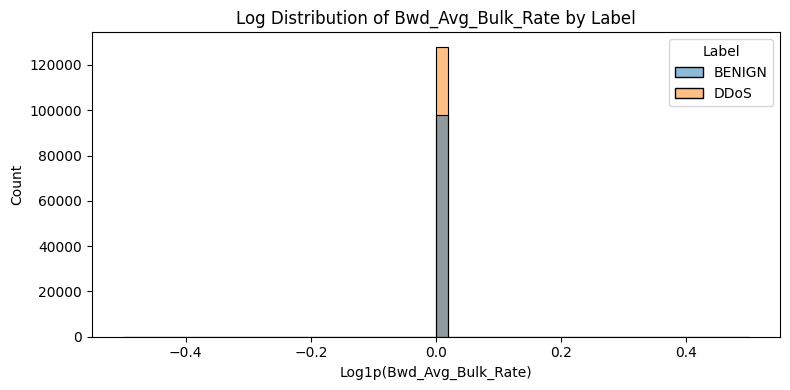

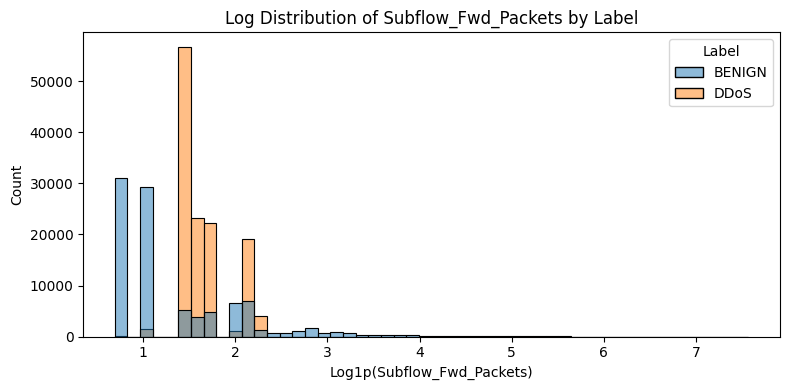

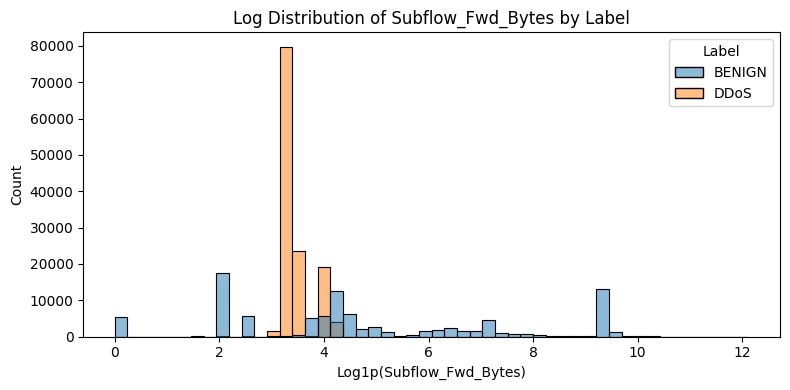

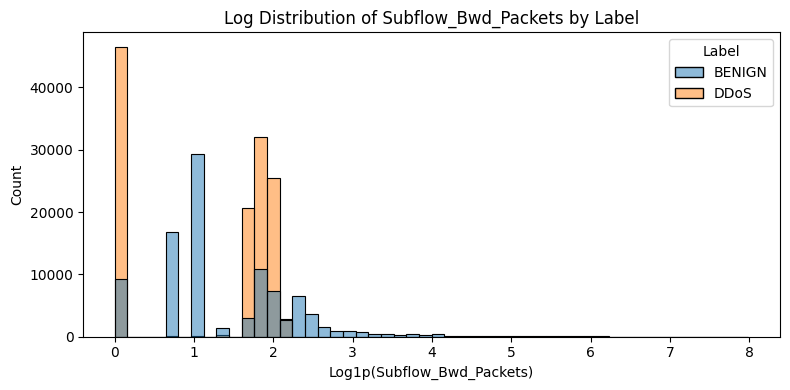

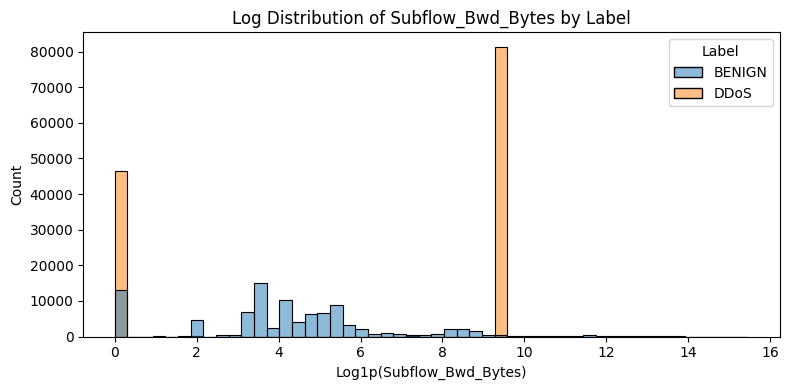

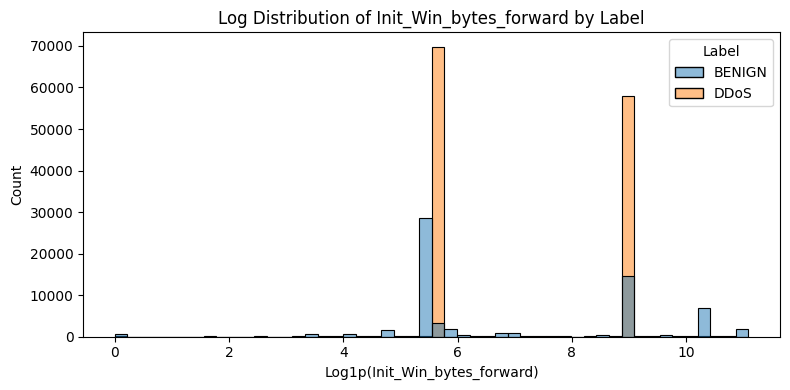

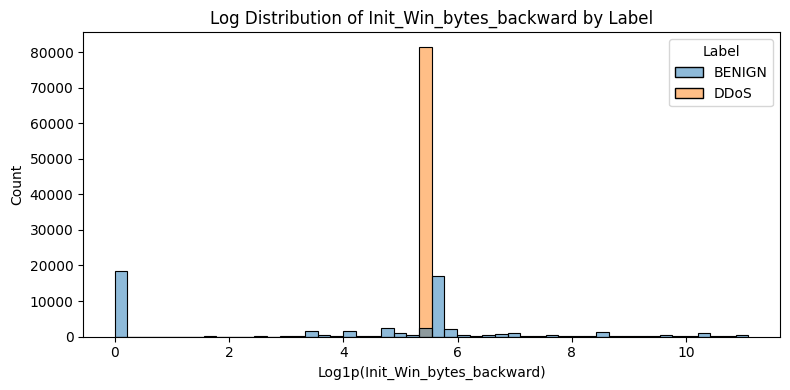

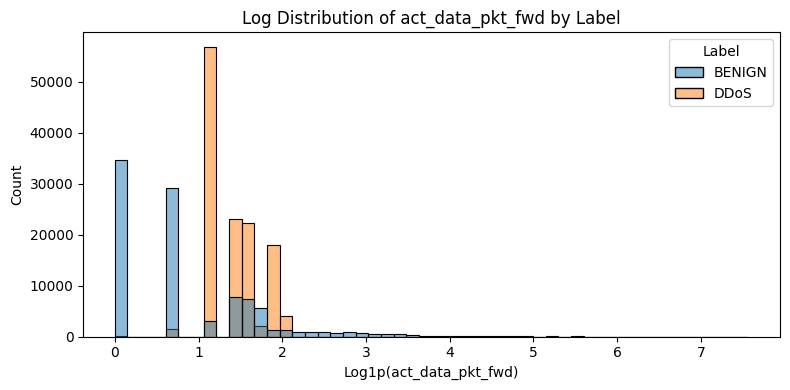

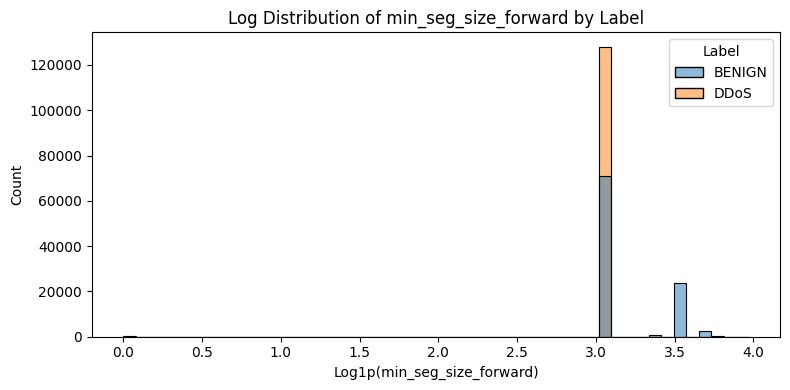

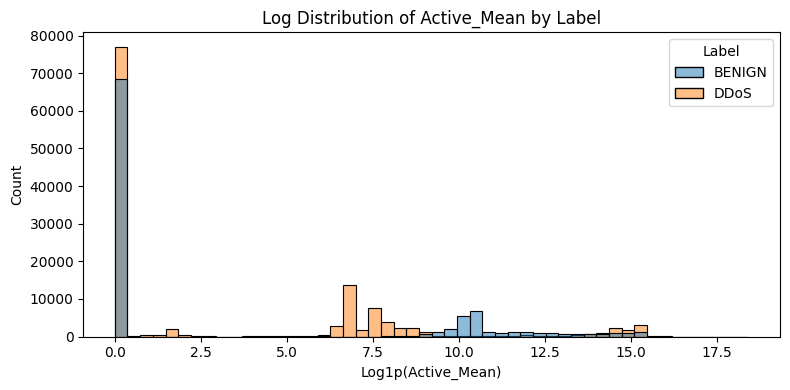

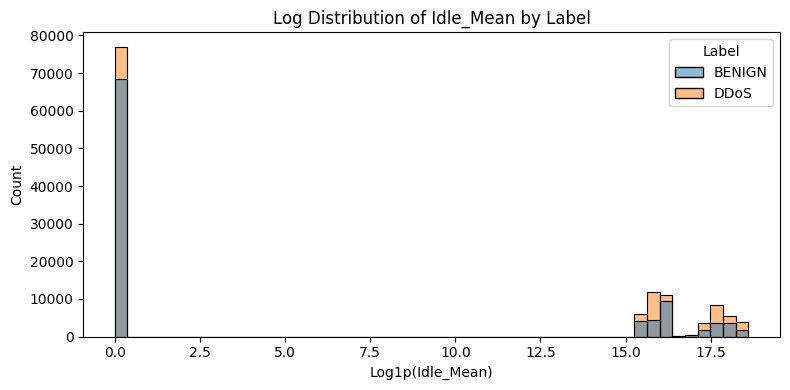

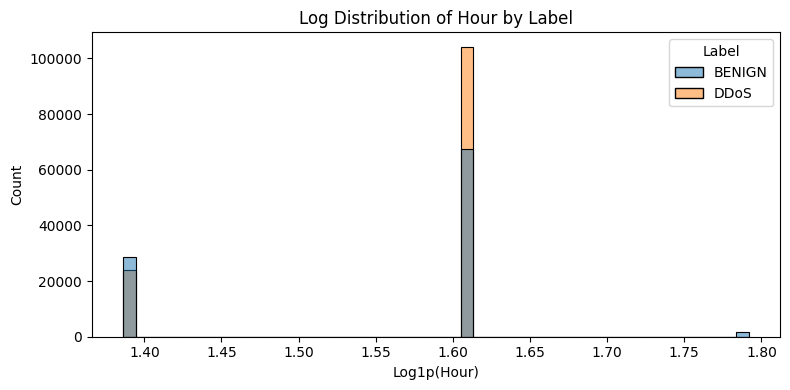

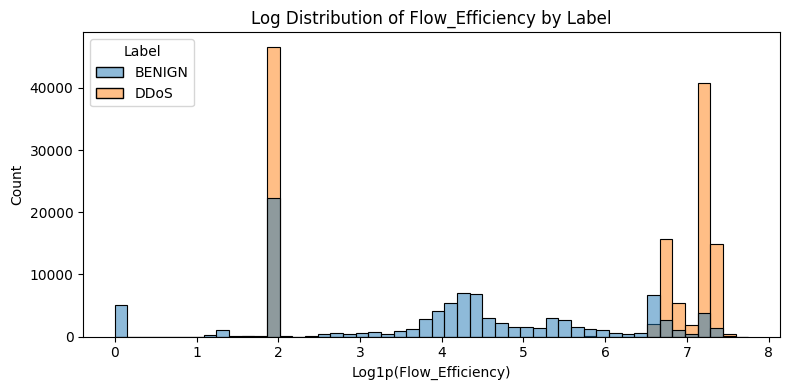

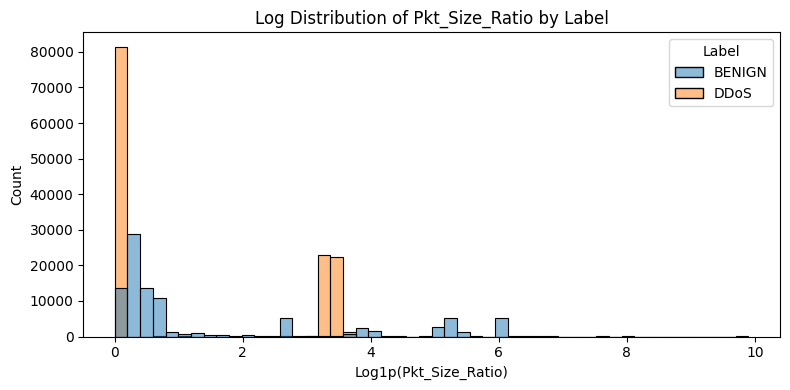

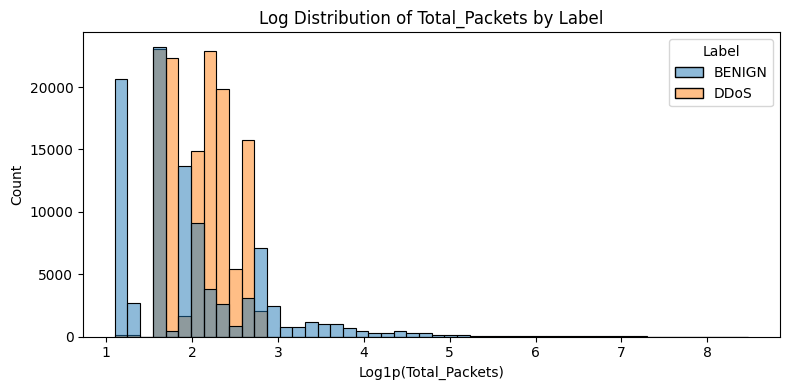

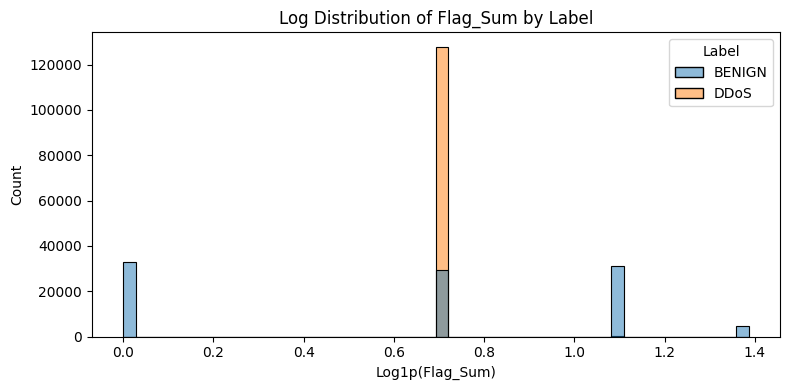

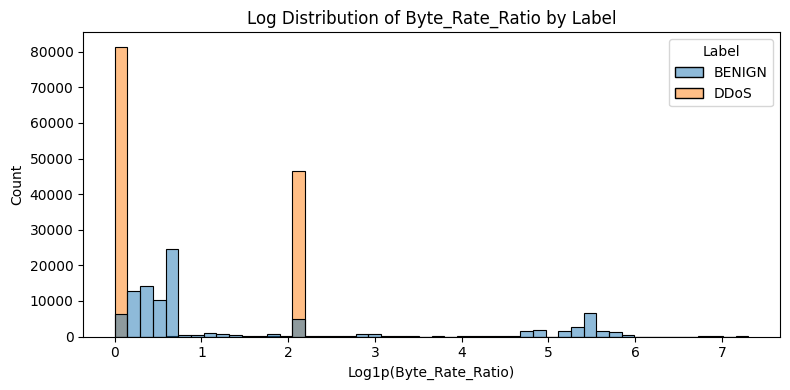

In [26]:
for col in df.select_dtypes('number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(x=np.log1p(df[col]), hue=df['Label'],bins=50)
    plt.title(f'Log Distribution of {col} by Label')
    plt.xlabel(f'Log1p({col})')
    plt.tight_layout()
    plt.show()

### 🧹 Data Preprocessing Strategy: Handling Outliers
---
In this step, we will explore and compare **four different approaches** for dealing with outlier points in the dataset:

1. **Delete Outliers**  
   → Remove rows that contain extreme outlier values.

2. **Keep Outliers and Use Robust Scaler**  
   → Retain all data but scale using `RobustScaler`, which is less sensitive to outliers.


3. **Keep Outliers and Use Standard Scaler**  
   → Retain all data but scale using `StandardScaler`.

4. **Keep Outliers**

   
---


#### 1. **Delete Outliers**  

In [27]:
outliers = pd.DataFrame()

for col in df.select_dtypes('number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outliers = pd.concat([outliers, outlier_rows])

outliers = outliers.drop_duplicates()

print(f"The shape of all outliers in the DataFrame is: {outliers.shape}")

The shape of all outliers in the DataFrame is: (156206, 45)


##### A large portion of the data contains outliers, so we won’t remove them to avoid losing valuable information.

#### 2. **Keep Outliers and Use Robust Scaler**  

In [19]:
df.dropna(inplace=True)

In [20]:
x ,  y = df.drop(['Label'] , axis = 1 ) , df['Label']

In [27]:
models =[[('LR', LogisticRegression()),
 ('KNNC', KNeighborsClassifier()),
 ('NB', MultinomialNB()),
 ('DTC', DecisionTreeClassifier()),
 ('RFC', RandomForestClassifier())]]

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

In [29]:
models = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

for model in models:
    pl = make_pipeline(RobustScaler(), model)
    scores = cross_validate(pl, X=x, y=y, cv=5, scoring=scoring, return_train_score=True)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train Accuracy : {scores['train_accuracy'].mean():.4f}")
    print(f"Test Accuracy  : {scores['test_accuracy'].mean():.4f}")
    print(f"Train Recall   : {scores['train_recall'].mean():.4f}")
    print(f"Test Recall    : {scores['test_recall'].mean():.4f}")
    print(f"Train Precision: {scores['train_precision'].mean():.4f}")
    print(f"Test Precision : {scores['test_precision'].mean():.4f}")
    print(f"Train F1 Score : {scores['train_f1'].mean():.4f}")
    print(f"Test F1 Score  : {scores['test_f1'].mean():.4f}")



Model: LogisticRegression
Train Accuracy : 0.9976
Test Accuracy  : 0.9964
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: RandomForestClassifier
Train Accuracy : 1.0000
Test Accuracy  : 0.9994
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: GradientBoostingClassifier
Train Accuracy : 0.9998
Test Accuracy  : 0.9993
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan


#### 3. **Keep Outliers and Use Standard Scaler**  

In [35]:
models = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

for model in models:
    pl = make_pipeline(StandardScaler(), model)
    scores = cross_validate(pl, X=x, y=y, cv=5, scoring=scoring, return_train_score=True)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train Accuracy : {scores['train_accuracy'].mean():.4f}")
    print(f"Test Accuracy  : {scores['test_accuracy'].mean():.4f}")
    print(f"Train Recall   : {scores['train_recall'].mean():.4f}")
    print(f"Test Recall    : {scores['test_recall'].mean():.4f}")
    print(f"Train Precision: {scores['train_precision'].mean():.4f}")
    print(f"Test Precision : {scores['test_precision'].mean():.4f}")
    print(f"Train F1 Score : {scores['train_f1'].mean():.4f}")
    print(f"Test F1 Score  : {scores['test_f1'].mean():.4f}")



Model: LogisticRegression
Train Accuracy : 0.9986
Test Accuracy  : 0.9979
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: RandomForestClassifier
Train Accuracy : 1.0000
Test Accuracy  : 0.9994
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: GradientBoostingClassifier
Train Accuracy : 0.9998
Test Accuracy  : 0.9993
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan


4. **Keep Outliers**

In [37]:
models = [
    LogisticRegression(max_iter=500),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

for model in models:
    pl = make_pipeline(model)
    scores = cross_validate(pl, X=x, y=y, cv=5, scoring=scoring, return_train_score=True)

    print(f"\nModel: {model.__class__.__name__}")
    print(f"Train Accuracy : {scores['train_accuracy'].mean():.4f}")
    print(f"Test Accuracy  : {scores['test_accuracy'].mean():.4f}")
    print(f"Train Recall   : {scores['train_recall'].mean():.4f}")
    print(f"Test Recall    : {scores['test_recall'].mean():.4f}")
    print(f"Train Precision: {scores['train_precision'].mean():.4f}")
    print(f"Test Precision : {scores['test_precision'].mean():.4f}")
    print(f"Train F1 Score : {scores['train_f1'].mean():.4f}")
    print(f"Test F1 Score  : {scores['test_f1'].mean():.4f}")



Model: LogisticRegression
Train Accuracy : 0.9456
Test Accuracy  : 0.9506
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: RandomForestClassifier
Train Accuracy : 1.0000
Test Accuracy  : 0.9994
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan

Model: GradientBoostingClassifier
Train Accuracy : 0.9998
Test Accuracy  : 0.9993
Train Recall   : nan
Test Recall    : nan
Train Precision: nan
Test Precision : nan
Train F1 Score : nan
Test F1 Score  : nan



---

### ✅ Final Decision on Scaler Choice

We observed that removing outliers distorts the data distribution and does not improve model performance. Both `RobustScaler` and `StandardScaler` produced similar results after outlier removal.

Additionally, keeping the outliers without any preprocessing led to the same results when using both scalers, except in the case of **Logistic Regression**, where the performance dropped by approximately **5%**.

> ✅ Therefore, we will choose **`RobustScaler`** because it is more **reliable and robust** when dealing with outliers, even if they do not seem to have a major impact at the moment.

---



---

### ⚠️ Handling NaN in Recall, Precision, and F1 Scores

We observed that **recall**, **precision**, and **F1-score** returned `NaN` values.
This happened because the target labels were not encoded properly, and the evaluation metrics could not identify the **positive class**.

> ✅ To fix this, we encoded the labels using `LabelEncoder`, which allowed the metrics to correctly interpret the class labels and calculate the scores accurately.

---




---

### 🎯 Evaluation Metric Selection

Based on the nature of the problem — detecting **DDoS attacks** — the priority is to **identify as many attacks as possible**, even if that leads to some false positives.

> ✅ Therefore, we will use **Recall** as the primary evaluation metric to assess model performance.

Recall is crucial in this context because missing a real attack (false negative) is **more dangerous** than incorrectly flagging normal traffic as malicious.

---


### 🔍 Feature Selection and Model Selection

In [111]:
x ,  y = df.drop(['Label'] , axis = 1 ) , df['Label']

In [113]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:

models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),               
    BernoulliNB(),              # Naive Bayes - Bernoulli (useful for binary features)
    DecisionTreeClassifier(),  
    KNeighborsClassifier(),     
    AdaBoostClassifier(),       
]


In [54]:
for model in models:
    pl = make_pipeline(
        RobustScaler(),
        SelectFromModel(estimator=DecisionTreeClassifier()),
        model 
    )

    cv = cross_validate(
        estimator=pl,
        X=x,
        y=y,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        error_score='raise'  
    )

    print(model)
    print(f"Train Accuracy: {cv['train_accuracy'].mean():.4f}")
    print(f"Test Accuracy : {cv['test_accuracy'].mean():.4f}")
    print(f"Train Recall  : {cv['train_recall'].mean():.4f}")
    print(f"Test Recall   : {cv['test_recall'].mean():.4f}")
    print('-' * 100)


LogisticRegression(max_iter=1000)
Train Accuracy: 0.8788
Test Accuracy : 0.8526
Train Recall  : 0.9868
Test Recall   : 0.9895
----------------------------------------------------------------------------------------------------
RandomForestClassifier()
Train Accuracy: 0.9989
Test Accuracy : 0.9989
Train Recall  : 0.9986
Test Recall   : 0.9985
----------------------------------------------------------------------------------------------------
GradientBoostingClassifier()
Train Accuracy: 0.9989
Test Accuracy : 0.9988
Train Recall  : 0.9984
Test Recall   : 0.9983
----------------------------------------------------------------------------------------------------
GaussianNB()
Train Accuracy: 0.8880
Test Accuracy : 0.8428
Train Recall  : 0.9995
Test Recall   : 0.9994
----------------------------------------------------------------------------------------------------
BernoulliNB()
Train Accuracy: 0.8616
Test Accuracy : 0.8505
Train Recall  : 0.9138
Test Recall   : 0.9328
---------------------

| Model                          | Test Recall | Test Accuracy | Notes                                                                   |
| ------------------------------ | ----------- | ------------- | ----------------------------------------------------------------------- |
| **GaussianNB**                 | **0.9994**  | 0.8428        | Very high recall, but low accuracy → not recommended 👎                 |
| **RandomForestClassifier**     | 0.9985      | 0.9989        | Excellent and stable performance ✅                                      |
| **DecisionTreeClassifier**     | 0.9985      | 0.9989        | Same performance as RF, but more prone to overfitting ⚠️                |
| **GradientBoostingClassifier** | 0.9983      | 0.9988        | Very strong and stable performance ✅                                    |
| **AdaBoostClassifier**         | 0.9983      | 0.9987        | Strong performance ✅                                                    |
| **KNeighborsClassifier**       | 0.9591      | 0.9766        | Decent performance, but lower than others 👌                            |
| **BernoulliNB**                | 0.9328      | 0.8505        | Good recall, but relatively weak accuracy ❌                             |
| **LogisticRegression**         | 0.9895      | 0.8526        | Good general performance, but weaker than boosting/tree-based models 👌 |


## 🔧 Hyperparameter Tuning

# 1-🔥 RandomForestClassifier

In [148]:
x ,  y = df.drop(['Label'] , axis = 1 ) , df['Label']

In [33]:
rf_pl = make_pipeline(RobustScaler(),SelectFromModel(estimator=DecisionTreeClassifier()),RandomForestClassifier()) 
rf_pl

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('randomforestclassifier', RandomForestClassifier())])

In [34]:
rf_pl.steps

[('robustscaler', RobustScaler()),
 ('selectfrommodel', SelectFromModel(estimator=DecisionTreeClassifier())),
 ('randomforestclassifier', RandomForestClassifier())]

In [38]:
rf_param = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 40],
    'randomforestclassifier__min_samples_split': [2,10],
    'randomforestclassifier__min_samples_leaf': [1,4],
    'randomforestclassifier__bootstrap': [True],
    'randomforestclassifier__random_state': [42],
    'randomforestclassifier__n_jobs': [-1],
    'randomforestclassifier__max_features': ['sqrt', 'log2']       
}


In [186]:
scoring = {
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

In [54]:
scoring = {
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

rf_srch = GridSearchCV(
    estimator=rf_pl,
    param_grid=rf_param,
    scoring=scoring,
    refit='recall', 
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True,
    error_score='raise'
)

In [55]:
rf_srch.fit(x , y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=DecisionTreeClassifier())),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__bootstrap': [True],
                         'randomforestcl...
                         'randomforestclassifier__min_samples_leaf': [1, 4],
                         'randomforestclassifier__min_samples_split': [2, 10],
                         'randomforestclassifier__n_estimators': [100, 200],
                         'randomforestclassifier__n_jobs': [-1],
                         'randomforestclassifier__random_state': [42]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score, response_method='predict', pos_label=DDoS)})

In [59]:
rf_srch.best_estimator_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [60]:
rf_srch.best_params_

{'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': -1,
 'randomforestclassifier__random_state': 42}

In [61]:
rf_srch.best_score_

np.float64(0.9985237258347979)

Mean Train Accuracy: 1.0000
Mean Test Accuracy : 0.9999
Mean Train Recall  : 1.0000
Mean Test Recall   : 0.9999


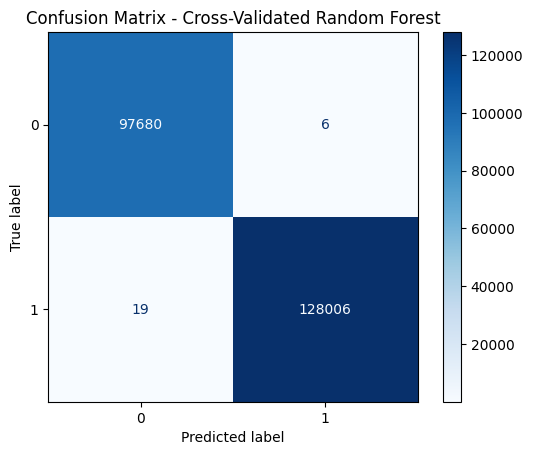

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
import matplotlib.pyplot as plt

# إنشاء نموذج Random Forest
best_rf_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    n_jobs=-1,
    random_state=42
)

scoring = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    best_rf_model,
    x,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

y_pred = cross_val_predict(best_rf_model, x, y, cv=cv)

print(f"Mean Train Accuracy: {scores['train_accuracy'].mean():.4f}")
print(f"Mean Test Accuracy : {scores['test_accuracy'].mean():.4f}")
print(f"Mean Train Recall  : {scores['train_recall'].mean():.4f}")
print(f"Mean Test Recall   : {scores['test_recall'].mean():.4f}")

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Cross-Validated Random Forest")
plt.show()


# 2- 🚀 GradientBoostingClassifier

In [190]:
gbc_pl = make_pipeline(RobustScaler(),SelectFromModel(estimator=DecisionTreeClassifier()),GradientBoostingClassifier()) 
gbc_pl

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [63]:
gbc_pl.steps

[('robustscaler', RobustScaler()),
 ('selectfrommodel', SelectFromModel(estimator=DecisionTreeClassifier())),
 ('gradientboostingclassifier', GradientBoostingClassifier())]

In [192]:
gbc_param = {
    'gradientboostingclassifier__n_estimators': [100, 200],             
    'gradientboostingclassifier__learning_rate': [0.05, 0.1],           
    'gradientboostingclassifier__max_depth': [3, 5],                    
    'gradientboostingclassifier__max_features': ['sqrt', 0.3, 0.5],     
    'gradientboostingclassifier__random_state': [42],                   
}

In [193]:
gbc_srch = GridSearchCV(estimator=gbc_pl , param_grid=gbc_param , scoring=scoring ,refit='recall'
                       , cv = StratifiedKFold(n_splits=5) , return_train_score=True,    error_score='raise' )

In [66]:
gbc_srch.fit(x , y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=DecisionTreeClassifier())),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__learning_rate': [0.05,
                                                                       0.1],
                         'gradientboostingclassifier__max_depth': [3, 5],
                         'gradientboostingclassifier__max_features': ['sqrt',
                                                                      0.3,
                                                                      0.5],
                         'gradientboostingclassifier__n_estimators': [100, 200],
                         'gradientboostingclassifier__random_state': [42]},
             refit='recall', return_train_score=True,
             scoring={'recall': make_scorer(recall_score, response_method='predict', pos_label=DDoS)})

In [67]:
gbc_srch.best_estimator_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=200,
                                            random_state=42))])

In [68]:
gbc_srch.best_params_

{'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__max_features': 'sqrt',
 'gradientboostingclassifier__n_estimators': 200,
 'gradientboostingclassifier__random_state': 42}

In [69]:
gbc_srch.best_score_

np.float64(0.998531536809217)

Mean Train Accuracy: 1.0000
Mean Test Accuracy : 0.9999
Mean Train Recall  : 1.0000
Mean Test Recall   : 0.9999


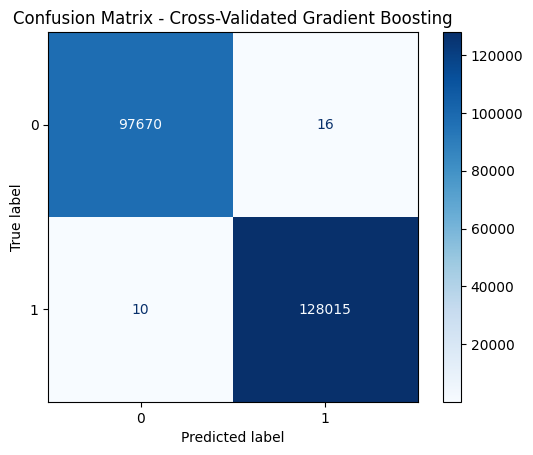

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
import matplotlib.pyplot as plt

best_gbc_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

scoring = {
    'accuracy': 'accuracy',
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(
    best_gbc_model,
    x,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=True
)

y_pred = cross_val_predict(best_gbc_model, x, y, cv=cv)

print(f"Mean Train Accuracy: {scores['train_accuracy'].mean():.4f}")
print(f"Mean Test Accuracy : {scores['test_accuracy'].mean():.4f}")
print(f"Mean Train Recall  : {scores['train_recall'].mean():.4f}")
print(f"Mean Test Recall   : {scores['test_recall'].mean():.4f}")

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Cross-Validated Gradient Boosting")
plt.show()


# 3-💡 AdaBoostClassifier

In [70]:
adb_pl = make_pipeline(RobustScaler(),SelectFromModel(estimator=DecisionTreeClassifier()),AdaBoostClassifier()) 
adb_pl

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('adaboostclassifier', AdaBoostClassifier())])

In [71]:
adb_pl.steps

[('robustscaler', RobustScaler()),
 ('selectfrommodel', SelectFromModel(estimator=DecisionTreeClassifier())),
 ('adaboostclassifier', AdaBoostClassifier())]

In [72]:
adb_param = {
    'adaboostclassifier__n_estimators': [50, 100, 200],       
    'adaboostclassifier__learning_rate': [0.05, 0.1, 0.5, 1.0], 
    'adaboostclassifier__algorithm': ['SAMME.R', 'SAMME'],   
    'adaboostclassifier__random_state': [42]                  
}

In [78]:
scoring = make_scorer(recall_score, pos_label='DDoS')

In [80]:
adb_srch = GridSearchCV(
    estimator=adb_pl,
    param_grid=adb_param,
    scoring=scoring,
    cv=StratifiedKFold(n_splits=5),
    return_train_score=True,
    error_score='raise'  
)

In [81]:
adb_srch.fit(x , y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise',
             estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('selectfrommodel',
                                        SelectFromModel(estimator=DecisionTreeClassifier())),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             param_grid={'adaboostclassifier__algorithm': ['SAMME.R', 'SAMME'],
                         'adaboostclassifier__learning_rate': [0.05, 0.1, 0.5,
                                                               1.0],
                         'adaboostclassifier__n_estimators': [50, 100, 200],
                         'adaboostclassifier__random_state': [42]},
             return_train_score=True,
             scoring=make_scorer(recall_score, response_method='predict', pos_label=DDoS))

In [82]:
adb_srch.best_estimator_

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('adaboostclassifier',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.05,
                                    random_state=42))])

In [83]:
adb_srch.best_params_

{'adaboostclassifier__algorithm': 'SAMME',
 'adaboostclassifier__learning_rate': 0.05,
 'adaboostclassifier__n_estimators': 50,
 'adaboostclassifier__random_state': 42}

In [84]:
adb_srch.best_score_

np.float64(1.0)


---

### 🎯 Final Recommendation

After extensive evaluation using stratified cross-validation, both **Random Forest** and **Gradient Boosting** classifiers demonstrated strong capabilities in detecting DDoS attacks.

However, since **recall** is the most critical metric in this context — ensuring that as many DDoS attacks as possible are correctly identified — we **recommend using Gradient Boosting**, as it consistently achieved **higher recall scores** across the validation folds.

> ✅ **Gradient Boosting** offers better sensitivity to attack patterns, making it more suitable for security-critical environments where **missing an attack is more costly than a false alarm**.

---



In [28]:
gbc_pl = make_pipeline(
    RobustScaler(),
    SelectFromModel(estimator=DecisionTreeClassifier()),
    GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

)

In [29]:
gbc_pl

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier())),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=200,
                                            random_state=42))])

In [31]:
selector = SelectFromModel(estimator=DecisionTreeClassifier())
selector.fit(x, y) 

mask = selector.get_support()

selected_features = x.columns[mask]
removed_features = x.columns[~mask]

print("✅ Selected Features:")
print(selected_features)

print("\n🗑️ Removed Features:")
print(removed_features)


✅ Selected Features:
Index(['Fwd_Packet_Length_Mean', 'Subflow_Fwd_Bytes'], dtype='object')

🗑️ Removed Features:
Index(['Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Bwd_Packet_Length_Mean', 'Flow_IAT_Mean',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',
       'Fwd_Packets/s', 'Bwd_Packets/s', 'Packet_Length_Mean', 'Down/Up_Ratio',
       'Average_Packet_Size', 'Fwd_Avg_Bytes/Bulk', 'Fwd_Avg_Packets/Bulk',
       'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk',
       'Bwd_Avg_Bulk_Rate', 'Subflow_Fwd_Packets', 'Subflow_Bwd_Packets',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active_Mean', 'Idle_Mean', 'Hour', 'Flow_Efficiency', 'Pkt_Size_Ratio',
       'Total_Packets', 'Flag_Sum', 'Byte_Rate_Ratio'],
      dtype='object')


In [116]:
gbc_pl = make_pipeline(
    RobustScaler(),
    SelectFromModel(estimator=DecisionTreeClassifier()),
    GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

)

In [32]:
cv = cross_validate(
        estimator=gbc_pl,
        X=x,
        y=y,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        error_score='raise'  
    )

print(f"Train Accuracy: {cv['train_accuracy'].mean():.4f}")
print(f"Test Accuracy : {cv['test_accuracy'].mean():.4f}")
print(f"Train Recall  : {cv['train_recall'].mean():.4f}")
print(f"Test Recall   : {cv['test_recall'].mean():.4f}")
print('-' * 100)


Train Accuracy: 0.9989
Test Accuracy : 0.9988
Train Recall  : 0.9984
Test Recall   : 0.9984
----------------------------------------------------------------------------------------------------


In [33]:
dt = DecisionTreeClassifier()
dt.fit(x, y)

importances = pd.Series(dt.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)

print(importances)


Fwd_Packet_Length_Mean     0.572355
Subflow_Fwd_Bytes          0.419209
Total_Packets              0.002683
Init_Win_bytes_backward    0.001396
Init_Win_bytes_forward     0.001222
Bwd_Packet_Length_Mean     0.000891
Byte_Rate_Ratio            0.000586
Flow_IAT_Mean              0.000534
Bwd_Packets/s              0.000417
Fwd_IAT_Mean               0.000161
Subflow_Bwd_Packets        0.000149
Fwd_Packets/s              0.000101
Flow_Efficiency            0.000072
Flag_Sum                   0.000063
Fwd_IAT_Total              0.000037
min_seg_size_forward       0.000036
Subflow_Fwd_Packets        0.000027
Bwd_IAT_Mean               0.000018
Bwd_IAT_Total              0.000018
Hour                       0.000016
Pkt_Size_Ratio             0.000010
Flow_Duration              0.000000
Total_Backward_Packets     0.000000
Total_Fwd_Packets          0.000000
Protocol                   0.000000
Fwd_PSH_Flags              0.000000
Bwd_Avg_Bulk_Rate          0.000000
Bwd_Avg_Packets/Bulk       0

In [34]:
gbc_pl = make_pipeline(
    RobustScaler(),
    SelectFromModel(estimator=DecisionTreeClassifier(),threshold=0.000416),
    GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

)

In [35]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, pos_label='DDoS')
}

In [37]:
cv = cross_validate(
        estimator=gbc_pl,
        X=x,
        y=y,
        cv=5,
        scoring=scoring,
        return_train_score=True,
        error_score='raise'  
    )

print(f"Train Accuracy: {cv['train_accuracy'].mean():.4f}")
print(f"Test Accuracy : {cv['test_accuracy'].mean():.4f}")
print(f"Train Recall  : {cv['train_recall'].mean():.4f}")
print(f"Test Recall   : {cv['test_recall'].mean():.4f}")
print('-' * 100)


Train Accuracy: 0.9996
Test Accuracy : 0.9989
Train Recall  : 1.0000
Test Recall   : 0.9997
----------------------------------------------------------------------------------------------------


In [38]:
# 1. Define the selector separately
selector = SelectFromModel(estimator=DecisionTreeClassifier(),threshold=0.000416)
selector.fit(x, y)  # X: your feature DataFrame, y: target

# 2. Boolean mask of selected features
mask = selector.get_support()

# 3. Get selected and removed features
selected_features = x.columns[mask]
removed_features = x.columns[~mask]

print("✅ Selected Features:")
print(selected_features)

print("\n🗑️ Removed Features:")
print(removed_features)


✅ Selected Features:
Index(['Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Mean', 'Flow_IAT_Mean',
       'Subflow_Fwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Total_Packets', 'Byte_Rate_Ratio'],
      dtype='object')

🗑️ Removed Features:
Index(['Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Fwd_IAT_Total', 'Fwd_IAT_Mean',
       'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Packet_Length_Mean', 'Down/Up_Ratio', 'Average_Packet_Size',
       'Fwd_Avg_Bytes/Bulk', 'Fwd_Avg_Packets/Bulk', 'Fwd_Avg_Bulk_Rate',
       'Bwd_Avg_Bytes/Bulk', 'Bwd_Avg_Packets/Bulk', 'Bwd_Avg_Bulk_Rate',
       'Subflow_Fwd_Packets', 'Subflow_Bwd_Packets', 'Subflow_Bwd_Bytes',
       'act_data_pkt_fwd', 'min_seg_size_forward', 'Active_Mean', 'Idle_Mean',
       'Hour', 'Flow_Efficiency', 'Pkt_Size_Ratio', 'Flag_Sum'],
      dtype='object')


# The final Model is :

In [39]:
gbc_pl = make_pipeline(
    RobustScaler(),
    SelectFromModel(estimator=DecisionTreeClassifier(),threshold=0.000416),
    GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

)


---

## ✅ Selected Features After Feature Selection

The following features were selected using `SelectFromModel` with a `DecisionTreeClassifier`, based on their importance scores:

* `Fwd_Packet_Length_Mean`
* `Bwd_Packet_Length_Mean`
* `Flow_IAT_Mean`
* `Subflow_Fwd_Bytes`
* `Init_Win_bytes_forward`
* `Init_Win_bytes_backward`
* `Total_Packets`
* `Byte_Rate_Ratio`

> ✅ These features were identified as the most informative and were retained for the final model training and prediction.

---



In [40]:
gbc_pl.fit(x,y)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('selectfrommodel',
                 SelectFromModel(estimator=DecisionTreeClassifier(),
                                 threshold=0.000416)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                                            n_estimators=200,
                                            random_state=42))])

In [41]:
joblib.dump(gbc_pl, 'GradientBoosting.h5')

['GradientBoosting.h5']

In [42]:
joblib.dump(x.columns.tolist(), 'columns.pkl')

['columns.pkl']

In [43]:
selected_features = x.columns[gbc_pl.named_steps['selectfrommodel'].get_support()]
print(selected_features)

Index(['Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Mean', 'Flow_IAT_Mean',
       'Bwd_Packets/s', 'Subflow_Fwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Total_Packets', 'Byte_Rate_Ratio'],
      dtype='object')


In [142]:
df[df['Label']=='DDoS'].iloc[18883]

Protocol                             6
Flow_Duration                  1746486
Total_Fwd_Packets                    3
Total_Backward_Packets               5
Fwd_Packet_Length_Mean        8.666667
Bwd_Packet_Length_Mean          2320.2
Flow_IAT_Mean                 249498.0
Fwd_IAT_Total                    13375
Fwd_IAT_Mean                    6687.5
Bwd_IAT_Total                  1746386
Bwd_IAT_Mean                  436596.5
Fwd_PSH_Flags                        0
Bwd_PSH_Flags                        0
Fwd_URG_Flags                        0
Bwd_URG_Flags                        0
Fwd_Packets/s                 1.717735
Bwd_Packets/s                 2.862892
Packet_Length_Mean         1291.888889
Down/Up_Ratio                        1
Average_Packet_Size           1453.375
Fwd_Avg_Bytes/Bulk                   0
Fwd_Avg_Packets/Bulk                 0
Fwd_Avg_Bulk_Rate                    0
Bwd_Avg_Bytes/Bulk                   0
Bwd_Avg_Packets/Bulk                 0
Bwd_Avg_Bulk_Rate        